We will learn how to extract data from the web, manipulate and clean data using Python's Pandas library, and data visualize using Python's Matplotlib library.

## Import Modules:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

## Load URL
specify the URL containing the dataset and pass it to urlopen() to get the html of the page.

In [24]:
url = "https://www.theguardian.com/news/datablog/2012/aug/09/best-selling-books-all-time-fifty-shades-grey-compare"
html = urlopen(url)

## Create a Beautiful Soup object from the html
This is done by passing the html to the BeautifulSoup() function. The Beautiful Soup package is used to parse the html, that is, take the raw html text and break it into Python objects. The second argument 'lxml' is the html parser.

In [25]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

The soup object allows you to extract interesting information about the website you're scraping such as getting the title of the page as shown below.

In [26]:
title = soup.title
print(title)

<title> The top 100 bestselling books of all time: how does Fifty Shades of Grey compare? | News | theguardian.com </title>


You can use the find_all() method of soup to extract useful html tags within a webpage. Examples of useful tags include < a > for hyperlinks, < table > for tables, < tr > for table rows, < th > for table headers, and < td > for table cells.

In [27]:
soup.find_all("table")

[<table cellpadding="0" cellspacing="0" class="in-article sortable">
 <caption>
 <h2>Top 100 best selling books of all time</h2>
 <p>UK sales only. Click heading to sort table. <a href="#data">Download this data</a></p>
 </caption>
 <thead>
 <tr>
 <th class="left bold" id="table-cell-10943--1-0" scope="col" style="color: #000000">
 <div>
 Rank
 </div> </th>
 <th class="left bold" id="table-cell-10943--1-1" scope="col" style="color: #000000">
 <div>
 Title
 </div> </th>
 <th class="left bold" id="table-cell-10943--1-2" scope="col" style="color: #000000">
 <div>
 Author
 </div> </th>
 <th class="left bold" id="table-cell-10943--1-3" scope="col" style="color: #000000">
 <div>
 Volume Sales
 </div> </th>
 <th class="left bold" id="table-cell-10943--1-4" scope="col" style="color: #000000">
 <div>
 Publisher
 </div> </th>
 <th class="last left bold" id="table-cell-10943--1-5" scope="col" style="color: #000000">
 <div>
 Genre
 </div> </th>
 </tr>
 </thead>
 <tfoot>
 <tr>
 <td colspan="6">
 <d

To print out table rows only, pass the 'tr' argument in soup.find_all().

In [28]:
rows = soup.find_all('tr')
print(rows[:10])

[<tr>
<th class="left bold" id="table-cell-10943--1-0" scope="col" style="color: #000000">
<div>
Rank
</div> </th>
<th class="left bold" id="table-cell-10943--1-1" scope="col" style="color: #000000">
<div>
Title
</div> </th>
<th class="left bold" id="table-cell-10943--1-2" scope="col" style="color: #000000">
<div>
Author
</div> </th>
<th class="left bold" id="table-cell-10943--1-3" scope="col" style="color: #000000">
<div>
Volume Sales
</div> </th>
<th class="left bold" id="table-cell-10943--1-4" scope="col" style="color: #000000">
<div>
Publisher
</div> </th>
<th class="last left bold" id="table-cell-10943--1-5" scope="col" style="color: #000000">
<div>
Genre
</div> </th>
</tr>, <tr>
<td colspan="6">
<div class="footer">
<div class="notes">
<p>SOURCE: <a href="//www.nielsenbookscan.co.uk/controller.php?page=48">NIELSEN BOOK SCAN</a></p>
</div>
</div> </td>
</tr>, <tr>
<td class="left" id="table-cell-10943-0-0" style="color: #000000"> 1 </td>
<td class="left" id="table-cell-10943-0-1" 

a for loop that iterates through table rows and prints out the cells of the rows.

In [29]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td class="left" id="table-cell-10943-99-0" style="color: #000000"> 100 </td>, <td class="left" id="table-cell-10943-99-1" style="color: #000000"> Jamie's Ministry of Food:Anyone Can Learn to Cook in 24 Hours </td>, <td class="left" id="table-cell-10943-99-2" style="color: #000000"> Oliver, Jamie </td>, <td class="left" id="table-cell-10943-99-3" style="color: #000000"> 791,095 </td>, <td class="left" id="table-cell-10943-99-4" style="color: #000000"> Penguin </td>, <td class="last left" id="table-cell-10943-99-5" style="color: #000000"> Food &amp; Drink: General </td>]


bs4.element.ResultSet

The output above shows that each row is printed with html tags embedded in each row. This is not what you want. You can use remove the html tags using Beautiful Soup or regular expressions.<br>
The easiest way to remove html tags is to use Beautiful Soup, and it takes just one line of code to do this. Pass the string of interest into BeautifulSoup() and use the get_text() method to extract the text without html tags.

In [30]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[ 100 ,  Jamie's Ministry of Food:Anyone Can Learn to Cook in 24 Hours ,  Oliver, Jamie ,  791,095 ,  Penguin ,  Food & Drink: General ]


Complete for loop

In [31]:
list_rows = []
for row in rows:
    cells = row.find_all('td')
    cells = [str(cell) for cell in cells]
    cleantext = BeautifulSoup(str(cells), "lxml").get_text()
    cleantext = cleantext.split("', '")
    list_rows.append(cleantext)
list_rows = list_rows[2:]
print(cleantext)
type(list_rows)

["[' 100 ", " Jamie\\'s Ministry of Food:Anyone Can Learn to Cook in 24 Hours ", ' Oliver, Jamie ', ' 791,095 ', ' Penguin ', " Food & Drink: General ']"]


list

In [32]:
col_labels = soup.find_all('th')
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()[1:-1].split(",")
cleantext2 = [c.strip() for c in cleantext2]
all_header.append(cleantext2)
print(cleantext2)

['Rank', 'Title', 'Author', 'Volume Sales', 'Publisher', 'Genre']


The next step is to convert the list into a dataframe and get a quick view of the first 10 rows using Pandas.

In [33]:
df = pd.DataFrame(list_rows, columns = cleantext2)
df.head(10)

,Rank,Title,Author,Volume Sales,Publisher,Genre
0,[' 1,"Da Vinci Code,The","Brown, Dan","5,094,805",Transworld,"Crime, Thriller & Adventure ']"
1,[' 2,Harry Potter and the Deathly Hallows,"Rowling, J.K.","4,475,152",Bloomsbury,Children\'s Fiction ']
2,[' 3,Harry Potter and the Philosopher\'s Stone,"Rowling, J.K.","4,200,654",Bloomsbury,Children\'s Fiction ']
3,[' 4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.","4,179,479",Bloomsbury,Children\'s Fiction ']
4,[' 5,Fifty Shades of Grey,"James, E. L.","3,758,936",Random House,Romance & Sagas ']
5,[' 6,Harry Potter and the Goblet of Fire,"Rowling, J.K.","3,583,215",Bloomsbury,Children\'s Fiction ']
6,[' 7,Harry Potter and the Chamber of Secrets,"Rowling, J.K.","3,484,047",Bloomsbury,Children\'s Fiction ']
7,[' 8,Harry Potter and the Prisoner of Azkaban,"Rowling, J.K.","3,377,906",Bloomsbury,Children\'s Fiction ']
8,[' 9,Angels and Demons,"Brown, Dan","3,193,946",Transworld,"Crime, Thriller & Adventure ']"
9,[' 10,Harry Potter and the Half-blood Prince:Childr...,"Rowling, J.K.","2,950,264",Bloomsbury,Children\'s Fiction ']


In [34]:
df["Rank"] = df["Rank"].str.strip("[' ")
df["Genre"] = df["Genre"].str.strip(" ']")
df.head(10)

,Rank,Title,Author,Volume Sales,Publisher,Genre
0,1,"Da Vinci Code,The","Brown, Dan","5,094,805",Transworld,"Crime, Thriller & Adventure"
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.","4,475,152",Bloomsbury,Children\'s Fiction
2,3,Harry Potter and the Philosopher\'s Stone,"Rowling, J.K.","4,200,654",Bloomsbury,Children\'s Fiction
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.","4,179,479",Bloomsbury,Children\'s Fiction
4,5,Fifty Shades of Grey,"James, E. L.","3,758,936",Random House,Romance & Sagas
5,6,Harry Potter and the Goblet of Fire,"Rowling, J.K.","3,583,215",Bloomsbury,Children\'s Fiction
6,7,Harry Potter and the Chamber of Secrets,"Rowling, J.K.","3,484,047",Bloomsbury,Children\'s Fiction
7,8,Harry Potter and the Prisoner of Azkaban,"Rowling, J.K.","3,377,906",Bloomsbury,Children\'s Fiction
8,9,Angels and Demons,"Brown, Dan","3,193,946",Transworld,"Crime, Thriller & Adventure"
9,10,Harry Potter and the Half-blood Prince:Childr...,"Rowling, J.K.","2,950,264",Bloomsbury,Children\'s Fiction


In [35]:
df.set_index("Rank", drop=True, inplace=True)
df.head()

,Title,Author,Volume Sales,Publisher,Genre
Rank,,,,,
1,"Da Vinci Code,The","Brown, Dan","5,094,805",Transworld,"Crime, Thriller & Adventure"
2,Harry Potter and the Deathly Hallows,"Rowling, J.K.","4,475,152",Bloomsbury,Children\'s Fiction
3,Harry Potter and the Philosopher\'s Stone,"Rowling, J.K.","4,200,654",Bloomsbury,Children\'s Fiction
4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.","4,179,479",Bloomsbury,Children\'s Fiction
5,Fifty Shades of Grey,"James, E. L.","3,758,936",Random House,Romance & Sagas


In [36]:
df.dtypes

Title           object
Author          object
Volume Sales    object
Publisher       object
Genre           object
dtype: object

In [40]:
l = df["Volume Sales"].tolist()
for i in range(len(l)):
    l[i]=l[i].strip().replace(",", "")
    l[i]=int(l[i])

In [44]:
df["Volume Sales"]=l
df.dtypes

Title           object
Author          object
Volume Sales     int64
Publisher       object
Genre           object
dtype: object

In [45]:
#The code below shows how to calculate statistics for numeric columns only in the dataframe.
df.describe(include=[np.number])

,Volume Sales
count,1.000000e+02
mean,1.497272e+06
std,9.077396e+05
min,7.910950e+05
25%,9.420580e+05
50%,1.111938e+06
75%,1.781836e+06
max,5.094805e+06


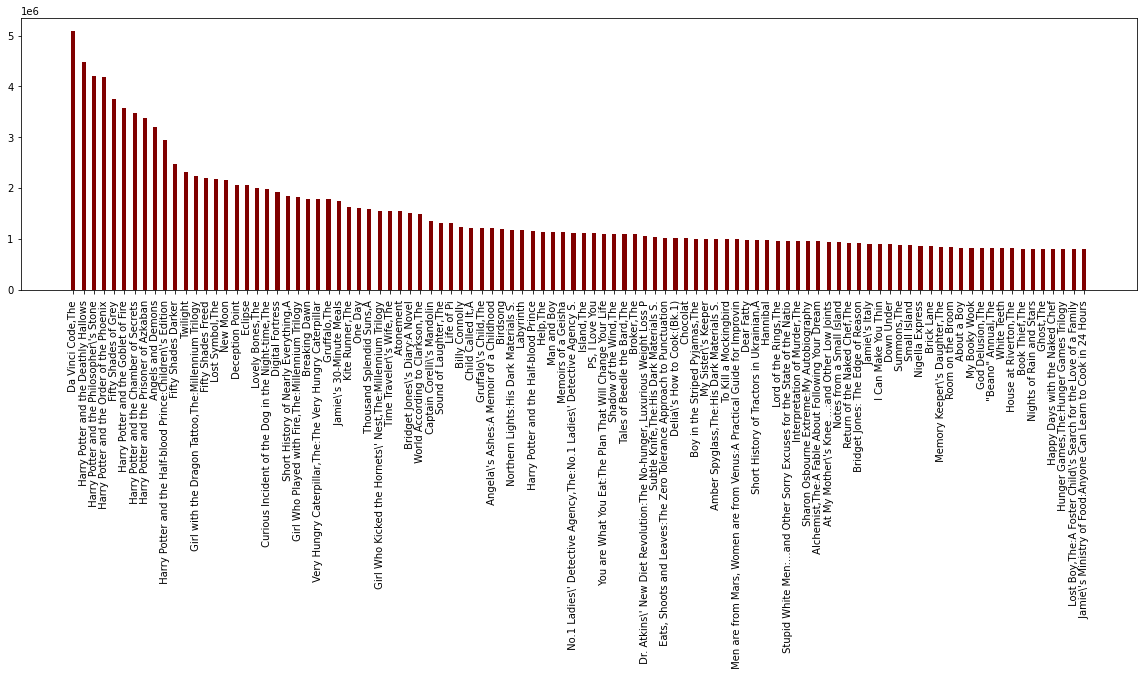

In [50]:
fig = plt.figure(figsize = (20, 5)) 
plt.bar(df["Title"], df["Volume Sales"], color ='maroon',  
        width = 0.4) 
plt.xticks(rotation=90)
plt.show()